<a href="https://www.kaggle.com/code/risakashiwabara/eda-milk-and-milk-production?scriptVersionId=147347105" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install xlrd --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import xlrd

In [3]:
df_data = pd.read_csv('/kaggle/input/japandairy-product-consumption-in-japan/milk and milk production.csv', index_col=0)
df_reset = df_data.reset_index('year')
df_index = df_reset [1:38]
df_columns = df_index.iloc[:,0:7]
# df = df_columns.drop('total', axis=1)
df = df_columns.dropna(how='all')


df

,year,Raw milk production,milk,Processed milk and ingredient-controlled milk,Milk beverage production,Fermented milk production,Lactobacillus Beverage Production
1,1986.0,"7,456,940","3,675,575","585,478","711,441","207,194","173,237"
2,1987.0,"7,334,943","3,857,606","577,862","730,262","225,054","174,169"
3,1988.0,"7,606,774","4,043,891","612,168","745,611","262,396","197,315"
4,1989.0,"8,058,946","4,160,641","644,773","761,646","288,740","220,044"
5,1990.0,"8,189,348","4,260,584","692,224","810,136","306,586","201,034"
6,1991.0,"8,259,134","4,242,017","727,656","820,331","300,458","195,420"
7,1992.0,"8,576,442","4,242,465","738,443","847,665","354,270","192,988"
8,1993.0,"8,625,699","4,174,961","738,960","853,262","393,294","183,381"
9,1994.0,"8,388,917","4,335,243","806,875","928,932","464,761","237,907"
10,1995.0,"8,382,162","4,249,653","789,667","920,872","487,482","207,798"


In [4]:
num_features = df.columns[1:13]
df[num_features].describe()

,Raw milk production,milk,Processed milk and ingredient-controlled milk,Milk beverage production,Fermented milk production,Lactobacillus Beverage Production
count,36,36,36,36,36,36
unique,36,36,36,36,36,36
top,"7,456,940","3,675,575","585,478","711,441","207,194","173,237"
freq,1,1,1,1,1,1


In [5]:
df['year'] = df['year'].astype(int)
df_=df.replace(",","", regex=True)
df_ = df_.astype('int')
df_.dtypes

/tmp/ipykernel_20/3711443778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


year                                             int64
Raw milk production                              int64
milk                                             int64
Processed milk and ingredient-controlled milk    int64
Milk beverage production                         int64
Fermented milk production                        int64
Lactobacillus Beverage Production                int64
dtype: object

# scatter-graph

Raw milk production


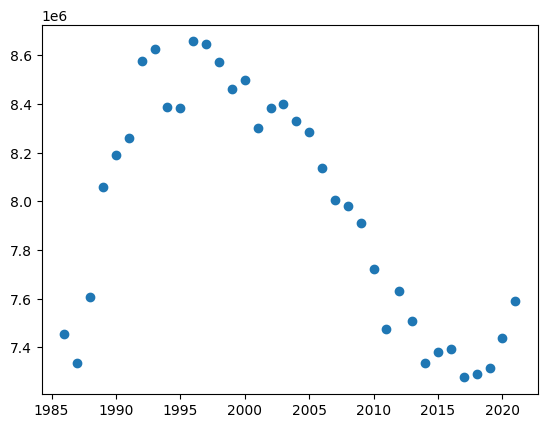

milk


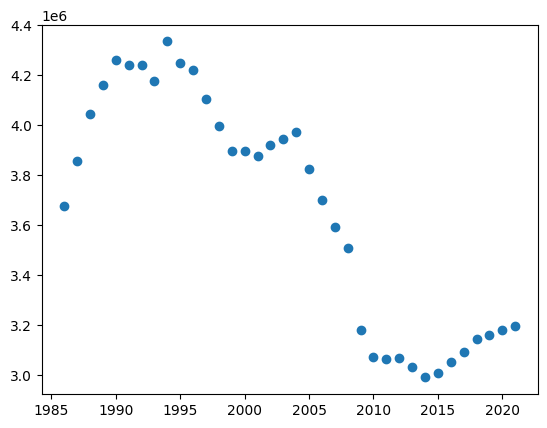

Processed milk and ingredient-controlled milk


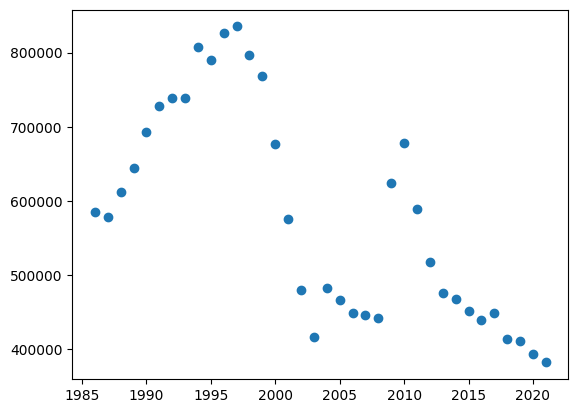

Milk beverage production


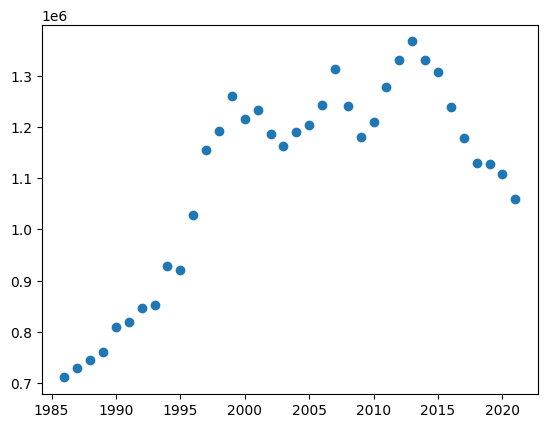

Fermented milk production


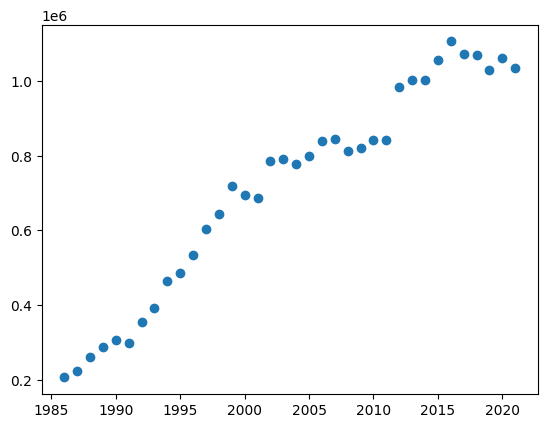

Lactobacillus Beverage Production


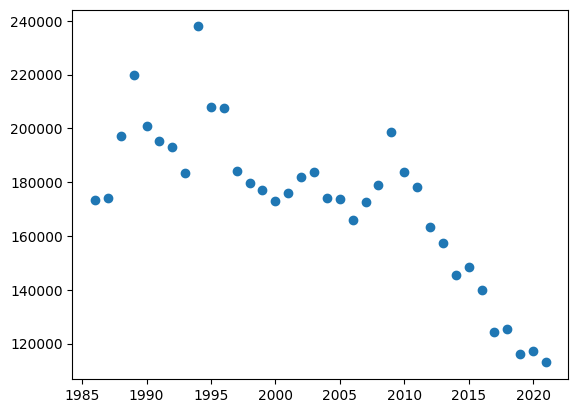

In [6]:
df_number = df_.select_dtypes(include=np.number)
i =  ['Raw milk production','milk','Processed milk and ingredient-controlled milk','Milk beverage production','Fermented milk production','Lactobacillus Beverage Production']
for a in i:
    print(a)
    plt.scatter(df_['year'],df_[a])
    plt.show()